170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 118ms/step - accuracy: 0.2702 - loss: 1.9628 - val_accuracy: 0.5004 - val_loss: 1.3844
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 112ms/step - accuracy: 0.4339 - loss: 1.5382 - val_accuracy: 0.5569 - val_loss: 1.2576
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.4888 - loss: 1.4143 - val_accuracy: 0.6019 - val_loss: 1.1257
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.5158 - loss: 1.3413 - val_accuracy: 0.6095 - val_loss: 1.1250
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.5365 - loss: 1.3060 - val_accuracy: 0.6291 - val_loss: 1.0407
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.5548 - loss: 1.2438 - val_accuracy: 0.6306 - val_loss: 1.0305
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.5686 - loss: 1.2285 - val_accuracy: 0.6557 - val_loss: 0.9879
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.5768 - loss: 1.2058 - va

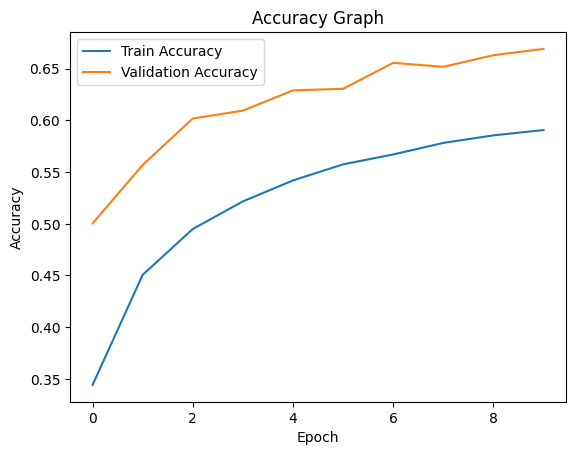


✅ Model training complete and saved successfully!


In [19]:
# ==============================
# CIFAR-10 CNN with Augmentation + Dropout
# ==============================

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# 1. Load Dataset
# ------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ------------------------------
# 2. Normalize Data
# ------------------------------
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding for labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ------------------------------
# 3. Data Augmentation
# ------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

# ------------------------------
# 4. Build CNN Model with Dropout
# ------------------------------
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# 🔥 Dropout Layer
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# ------------------------------
# 5. Compile Model
# ------------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ------------------------------
# 6. Train Model
# ------------------------------
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test)
)

# ------------------------------
# 7. Evaluate Model
# ------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nFinal Test Accuracy:", test_acc)

# ------------------------------
# 8. Plot Accuracy Graph
# ------------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ------------------------------
# 9. Save Model
# ------------------------------
model.save("cifar10_cnn_dropout.h5")

print("\n✅ Model training complete and saved successfully!")